<a href="https://colab.research.google.com/github/ba88052/wine_quality_analysis/blob/main/%E7%B4%85%E9%85%92%E5%93%81%E8%B3%AA%E6%AA%A2%E6%B8%AC(Kaggle).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Need to do it evertime

In [1]:
#查看是否在colab環境
try:
    from google.colab import drive, files
    in_colab = True
except ModuleNotFoundError:
    in_colab = False

from google.colab import drive

#import常用套件與版本
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn
import matplotlib
import matplotlib.pyplot as plt
import scipy
import sklearn
import gdown
import requests
#print("Numpy Version：", np.__version__)
#print("Pandas Version：",pd.__version__)
#print("Statsmodels Version：",sm.__version__)
#print("Seaborn Version：",seaborn.__version__)
#print("Matplotlib Version：",matplotlib.__version__)
#print("Scipy Version：",scipy.__version__)
#print("SKLearn Version：",sklearn.__version__)
#print("gdown Version：", gdown.__version__)
#print("requests Version：", requests.__version__)


#掛載Google Drive（需更改路徑）
if in_colab:
  home_dir = ""
  drive.mount("/content/drive")
  groot_dir = "/content/drive/My Drive/DataAnalysis"

import os
file1 = os.path.join(groot_dir, "Testing.jpg")
f = file1
print(f)
print(os.path.exists(f))


#偵測環境
import platform
print("We're running on", platform.platform())
print("Python version", platform.python_version())
print(platform.uname())


#印出當前時間（確認時間沒問題）
from datetime import datetime
from dateutil.relativedelta import *
local_time = lambda x, offset: x + relativedelta(hours= offset)
#因為用虛擬機，內置為格林威治+0時間
def local_now(hours = 8):
    return datetime.now() + relativedelta(hours = hours if in_colab else 0)

def print_now():
    return print(local_now())

def print_local_now():
    return print('Local Time:', local_now())


print('\nData storage points to ==>', groot_dir)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/drive
/content/drive/My Drive/DataAnalysis/Testing.jpg
True
We're running on Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic
Python version 3.7.13
uname_result(system='Linux', node='f841901c9a1d', release='5.4.188+', version='#1 SMP Sun Apr 24 10:03:06 PDT 2022', machine='x86_64', processor='x86_64')

Data storage points to ==> /content/drive/My Drive/DataAnalysis


In [2]:
wine_folder = groot_dir + "/wine_quality"
url = os.path.join(wine_folder, "winequality-red.csv")
dfw = pd.read_csv(url)

bins = (2, 6.5, 8)
group_names = [0, 1]
dfw["quality"] = pd.cut(
    dfw["quality"], bins = bins, labels = group_names
)
dfw["quality"] = dfw["quality"].astype(int)
dfw.quality.value_counts()

0    1382
1     217
Name: quality, dtype: int64

#資料視覺化&特徵觀察

- fixed acidity 固定酸度
- volatile acidity 揮發性酸度
- citric acid 檸檬酸
- residual sugar 殘糖
- chlorides 氯化物
- free sulfur dioxide 游離二氧化硫
- total sulfur dioxide 總二氧化硫
- sulphates 硫酸鹽
- alcohol 酒精
- pH 酸鹼值
- density 密度

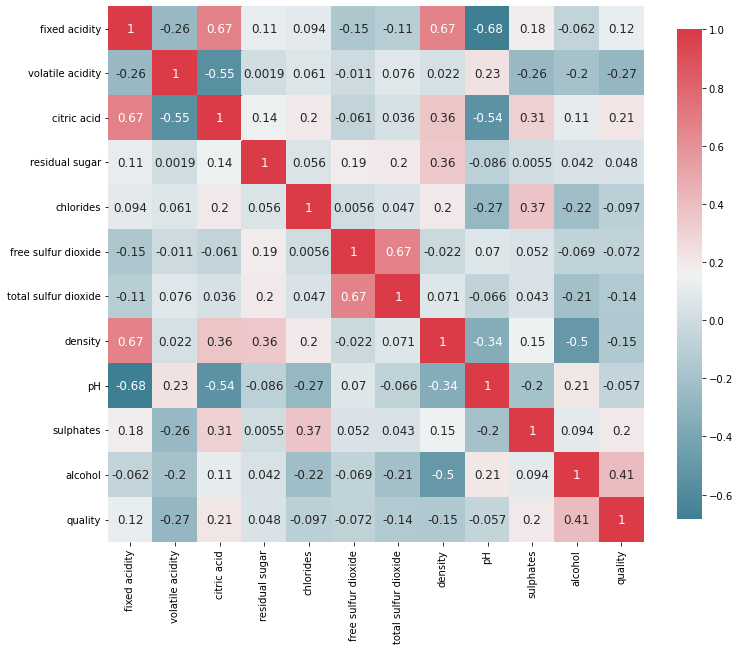

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

sns.heatmap(
  dfw.corr(), 
	cmap = cmap,
	square=True, 
	ax = plt.subplots( figsize =( 12 , 10 ) )[1],
  cbar_kws={ 'shrink' : .9 }, 
	annot = True, 
	annot_kws = { 'fontsize' : 12 }
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


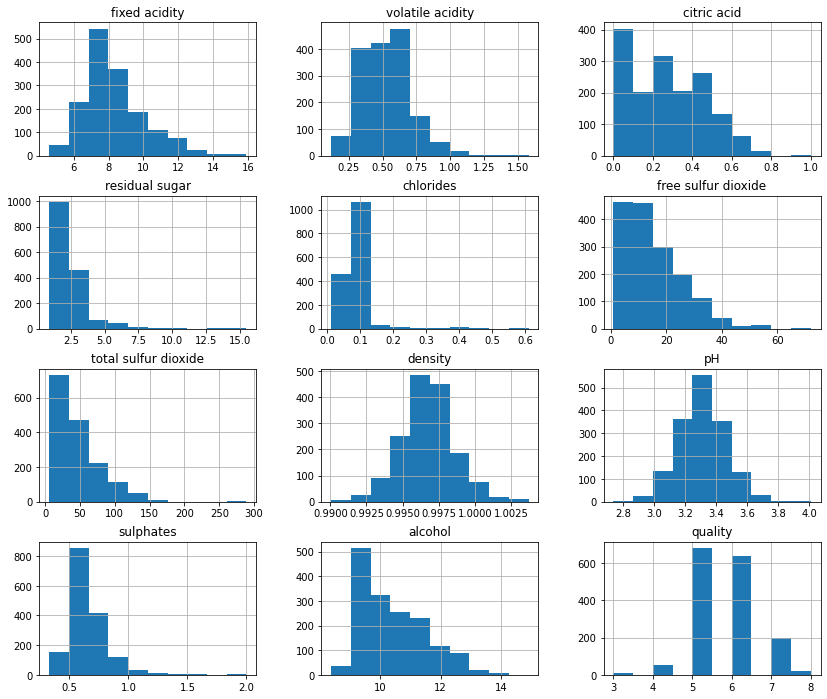

In [24]:
#畫出各個特徵值的分佈情況
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize = (14, 12))
dfw.hist(ax = ax) #or df.hist(bins = 10, figsize = (14,13)) figsize也可以寫在這
plt.show()

5    681
6    638
7    199
4     53
8     18
3     10
Name: label, dtype: int64

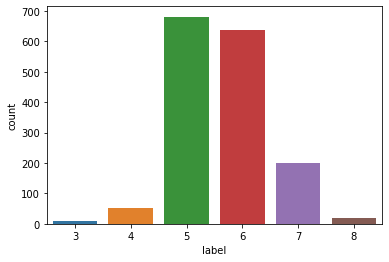

In [25]:
cnt = pd.DataFrame()
cnt["label"] = dfw.quality
ax = sns.countplot(x = "label", data = cnt)
cnt["label"].value_counts()

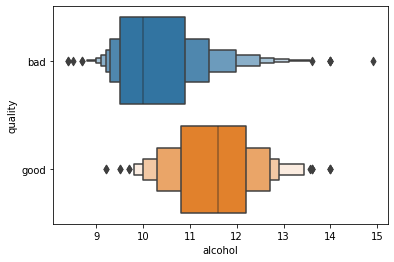

In [29]:
sns.boxenplot(x = "alcohol", y ="quality", data = df)

#資料處理&特徵工程

In [15]:
from sklearn.model_selection import train_test_split

X = dfw.drop('quality', axis = 1)
y = dfw['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)



In [84]:
#因特徵量巨大，運用隨機森林，從模型中選擇較有用的特徵
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(X_train, y_train)
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(X_train)
train_reduced

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([[ 0.54   ,  0.45   ,  0.9991 ,  0.62   ,  9.4    ],
       [ 0.26   ,  0.45   ,  0.9972 ,  0.54   ,  9.6    ],
       [ 0.35   ,  0.55   ,  0.9971 ,  0.79   , 10.6    ],
       ...,
       [ 0.57   ,  0.31   ,  0.99677,  0.69   ,  9.5    ],
       [ 0.47   ,  0.49   ,  1.0021 ,  0.68   , 12.7    ],
       [ 0.98   ,  0.32   ,  0.998  ,  0.48   ,  9.4    ]])

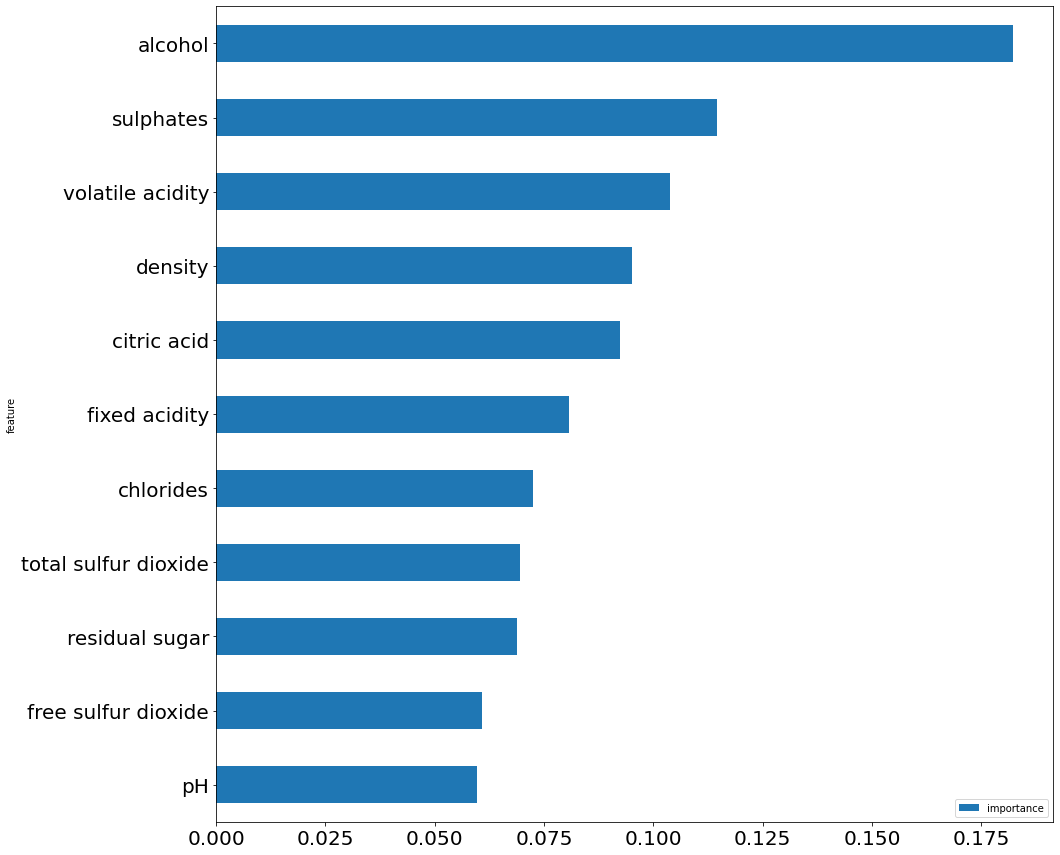

In [85]:
features.plot(kind='barh', figsize=(15, 15), fontsize = 20)

In [3]:
dfw_drop = dfw.drop(["pH", "free sulfur dioxide", "residual sugar", "total sulfur dioxide"], axis = 1)

In [4]:
from sklearn.model_selection import train_test_split

X = dfw_drop.drop('quality', axis = 1)
y = dfw_drop['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)


In [5]:
# label smoothing（不是正規化限縮到0-1而是限縮到0.01 - 1）
fac = 0.99/255
x_train = X_train * fac + 0.01
x_test = X_test * fac + 0.0

In [116]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 5)
rfc_eval

array([0.89453125, 0.88671875, 0.8828125 , 0.89453125, 0.90980392])

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = dfw.drop('quality', axis = 1)
y = dfw['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
rfc = RandomForestClassifier(n_estimators=200)
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 5)
rfc_eval

array([0.87890625, 0.9296875 , 0.8828125 , 0.92578125, 0.90980392])

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

models = []
models.append(('LinearSVC', LinearSVC()))
models.append(('StochasticGD', SGDClassifier()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('DecisionTree', DecisionTreeClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('KNeighbors', KNeighborsClassifier()))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('LR Classifier', LogisticRegression()))
models

[('LinearSVC', LinearSVC()),
 ('StochasticGD', SGDClassifier()),
 ('RandomForest', RandomForestClassifier()),
 ('DecisionTree', DecisionTreeClassifier()),
 ('GaussianNB', GaussianNB()),
 ('KNeighbors', KNeighborsClassifier()),
 ('AdaBoost', AdaBoostClassifier()),
 ('LR Classifier', LogisticRegression())]

In [13]:
from sklearn.model_selection import cross_val_score

def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [23]:
from sklearn.metrics import classification_report

scores = []
for i, l in models:
    l.fit(X_train, y_train)
    pre_y = l.predict(X_test)
    rep = classification_report(y_test, pre_y)
    scores.append([i, rep])

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#模型優化

In [33]:
# turn run_gs to True if you want to run the gridsearch again.
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(n_splits=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation,
                               verbose=1
                              )

    grid_search.fit(X_train, y_train)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))

else:
    parameters = {'bootstrap': False, 
                  'max_depth': 8, 
                  'max_features': 'log2', 
                  'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
    model = RandomForestClassifier(**parameters)
    model.fit(X_train, y_train)

In [34]:
model

RandomForestClassifier(bootstrap=False, max_depth=8, max_features='log2',
                       n_estimators=50)

In [35]:
pre_y = model.predict(X_test)
rep = classification_report(y_test, pre_y)

In [37]:
print(rep)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       273
           1       0.69      0.53      0.60        47

    accuracy                           0.90       320
   macro avg       0.81      0.75      0.77       320
weighted avg       0.89      0.90      0.89       320

